In [3]:
import pangolin as pg

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Question 1

In [3]:
from scipy.stats import norm

In [6]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1.5, 1.0, 0.5, 1.2, 2.5]
slopes_values = [0, 0.25, 0.5, 0.75, 1]

def Probability_Y_Given_S(slope_value, x, y):
    y_equation = slope_value * x
    prob_y = norm.pdf(y, loc=y_equation, scale=1)
    return prob_y

probs_of_all_s = [1 for _ in range(len(slopes_values))]
for i, s in enumerate(slopes_values):
    for j in range(len(x)):
        cur_x, cur_y = x[j], y[j]
        prob_y_given_s = Probability_Y_Given_S(s, cur_x, cur_y)
        probs_of_all_s[i] *= prob_y_given_s

posterior = [.2 * p for p in probs_of_all_s]
sm = sum(posterior)
normal_posterior = [p / sm for p in posterior]
normal_posterior


[0.009456905156440607,
 0.7751024227873098,
 0.21523816927002018,
 0.00020250214073843964,
 6.454908376547967e-10]

In [4]:
import matplotlib.pyplot as plt

Question 2

In [6]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]

w = pg.categorical([.2,.2,.2,.2,.2])
s_values = pg.makerv([0, 0.25, 0.5, 0.75, 1])
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)

#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(s_values[w] * x, 1) for x in inputs]


# y
w_samples, n_samples = pg.sample((w, noise), y, outputs)
w_samples = [.25 * w for w in w_samples]

probs = [0 for i in range(len(s_values))]
for j, s in enumerate(w_samples):
    for i, sval in enumerate(s_floats):
        if s == sval:
            probs[i] += 1

probs = [p / len(w_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior


[0.010299999999999998,
 0.7709999999999999,
 0.21849999999999997,
 0.00019999999999999998,
 0.0]

Question 3

[0.0203, 0.1087, 0.2952, 0.353, 0.1803, 0.0391, 0.0033, 0.0001, 0.0, 0.0]

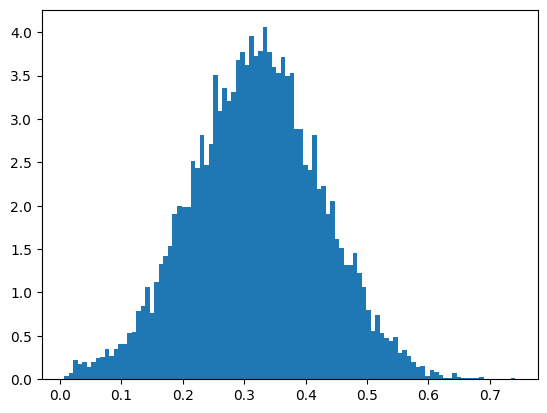

In [21]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [i * .1 for i in range(0, 10)]
noise = pg.normal(0, 1)

#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(s * x, 1) for x in inputs]


# y
s_samples, n_samples = pg.sample((s, noise), y, outputs)
plt.hist(s_samples, density=True, bins=100)

# probs = [0 for i in range(len(s_floats))]
# for j, s in enumerate(s_samples):
#     for i, sval in enumerate(s_floats):
#         if s < sval + .1 and s >= sval:
#             probs[i] += 1

# probs = [p / len(s_samples) for p in probs]

# posterior = [p * .1 for p in probs]

# s = sum(posterior)
# normal_posterior = [p / s for p in posterior]
# normal_posterior

Question 4

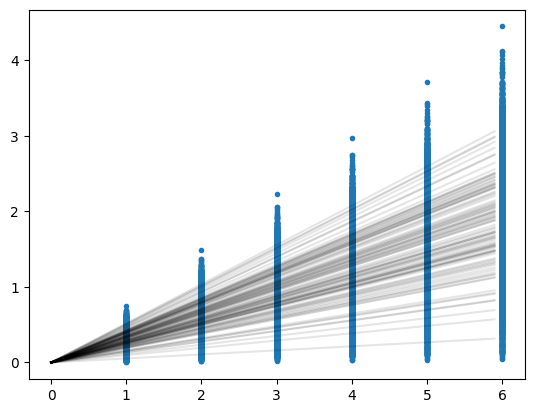

In [22]:
import numpy as np

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]

plt.plot(x,y,'.')
for s in s_samples[::100]:
    xs = np.arange(0,6,.1)
    plt.plot(xs, s*xs,'k-',alpha=0.1)

Question 5

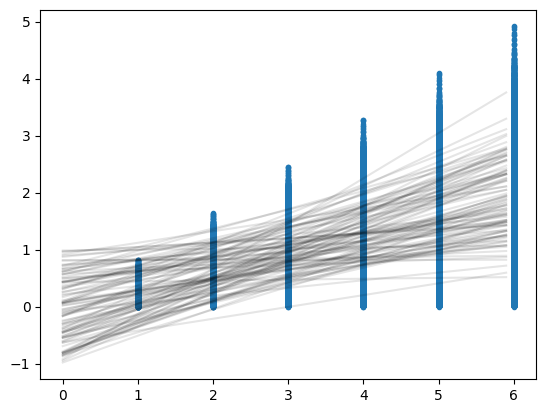

In [25]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)
bias = pg.uniform(-1,1)
#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(bias + s * x, 1) for x in inputs]


# y
s_samples, n_samples, bias_samples = pg.sample((s, noise, bias), y, outputs)
# plt.hist(s_samples, density=True, bins=100)
# plt.hist(bias_samples, density=True, bins=100)
probs = [0 for i in range(len(s_floats))]
for j, s in enumerate(s_samples):
    for i, sval in enumerate(s_floats):
        if s <= sval + .25 and s >= sval:
            probs[i] += 1

probs = [p / len(s_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]
plt.plot(x,y,'.')
for (b, s) in zip(bias_samples[::100], s_samples[::100]):
    xs = np.arange(0,6,.1)
    plt.plot(xs, b + s*xs,'k-',alpha=0.1)


Quesiton 6